# 📊 Netflix 데이터 시각화 - 전처리 & 시각화

**목표**: Netflix 데이터를 전처리하고 matplotlib으로 시각화하기

**시간**: 60분

---

## Section 1: 데이터 로드 (10분)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드
df = pd.read_csv('../data/netflix_titles.csv')

# 기본 정보 확인
print(f"데이터 크기: {len(df):,}행 x {len(df.columns)}열")
print(f"\n{'='*50}")
df.head()

데이터 크기: 8,807행 x 12열



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 데이터 정보 확인
df.info()

---

## Section 2: 데이터 탐색 (10분)

In [2]:
# 결측치 현황
print("=== 결측치 현황 ===")
missing = df.isnull().sum()
print(missing[missing > 0])  # 결측치가 있는 컬럼만 표시

print(f"\n결측치 비율 (%)")
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct[missing_pct > 0].sort_values(ascending=False))

=== 결측치 현황 ===
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

결측치 비율 (%)
director      29.908028
country        9.435676
cast           9.367549
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64


In [3]:
# 기본 통계
print("\n=== 기본 통계 ===")
df.describe()


=== 기본 통계 ===


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# 콘텐츠 유형 확인
print("\n=== 콘텐츠 정보 ===")
print(f"콘텐츠 유형: {df['type'].unique()}")
print(f"제작 국가 수: {df['country'].nunique()}")
print(f"시청 등급 종류: {df['rating'].nunique()}")
print(f"\n시청 등급별 분포:")
print(df['rating'].value_counts().head(10))


=== 콘텐츠 정보 ===
콘텐츠 유형: ['Movie' 'TV Show']
제작 국가 수: 748
시청 등급 종류: 17

시청 등급별 분포:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


---

## Section 3: 결측치 처리 (15분)

In [10]:
print("📋 결측치 처리 전:")
print(f"총 행 수: {len(df):,}\n")

# director 결측치 처리
df['director'] = df['director'].fillna('Unknown')
print(f"✅ director: Unknown으로 채움 ({df['director'].isnull().sum()} 남음)")

# cast 결측치 처리
df['cast'] = df['cast'].fillna('Unknown')
print(f"✅ cast: Unknown으로 채움 ({df['cast'].isnull().sum()} 남음)")

# country 결측치 처리
df['country'] = df['country'].fillna('Unknown')
print(f"✅ country: Unknown으로 채움 ({df['country'].isnull().sum()} 남음)")

# date_added 결측치 제거
print(f"\n⚠️ date_added: {df['date_added'].isnull().sum()}개 행 제거")
df = df.dropna(subset=['date_added'])
print(f"✅ 제거 후 총 행 수: {len(df):,}행")

# rating 결측치 처리
df['rating'] = df['rating'].fillna('Not Rated')
print(f"✅ rating: Not Rated로 채움 ({df['rating'].isnull().sum()} 남음)")

print(f"\n{'='*50}")
print(f"✅ 결측치 처리 완료: {len(df):,}행 남음")

📋 결측치 처리 전:
총 행 수: 8,797

✅ director: Unknown으로 채움 (0 남음)
✅ cast: Unknown으로 채움 (0 남음)
✅ country: Unknown으로 채움 (0 남음)

⚠️ date_added: 0개 행 제거
✅ 제거 후 총 행 수: 8,797행
✅ rating: Not Rated로 채움 (0 남음)

✅ 결측치 처리 완료: 8,797행 남음


---

## Section 4: 파생변수 생성 (15분)

### 파생변수 6개 생성하기

### 4.1 연대 (decade)

In [11]:
df['decade'] = (df['release_year'] // 10) * 10
print(f"✅ decade 컬럼 추가")
print(f"연대별 분포: {sorted(df['decade'].unique())}")
print(f"\n샘플:")
print(df[['title', 'release_year', 'decade']].head(5))

✅ decade 컬럼 추가
연대별 분포: [np.int64(1920), np.int64(1940), np.int64(1950), np.int64(1960), np.int64(1970), np.int64(1980), np.int64(1990), np.int64(2000), np.int64(2010), np.int64(2020)]

샘플:
                   title  release_year  decade
0   Dick Johnson Is Dead          2020    2020
1          Blood & Water          2021    2020
2              Ganglands          2021    2020
3  Jailbirds New Orleans          2021    2020
4           Kota Factory          2021    2020


### 4.2 한국 콘텐츠 여부 (is_korean)

In [12]:
df['is_korean'] = df['country'].str.contains('South Korea', na=False)
korean_count = df['is_korean'].sum()
print(f"✅ is_korean 컬럼 추가: 한국 콘텐츠 {korean_count:,}개")
print(f"\n샘플 (한국 콘텐츠):")
print(df[df['is_korean']][['title', 'country']].head(5))

✅ is_korean 컬럼 추가: 한국 콘텐츠 231개

샘플 (한국 콘텐츠):
                           title        country
104          Tayo the Little Bus    South Korea
124  Pororo - The Little Penguin    South Korea
193                         D.P.  , South Korea
289            The Crowned Clown    South Korea
456             Her Private Life    South Korea


### 4.3 제목 길이 (title_length)

In [13]:
df['title_length'] = df['title'].str.len()
print(f"✅ title_length 컬럼 추가")
print(f"평균 제목 길이: {df['title_length'].mean():.1f}자")
print(f"최대/최소 제목 길이: {df['title_length'].max()}/{df['title_length'].min()}자")
print(f"\n샘플:")
print(df[['title', 'title_length']].head(5))

✅ title_length 컬럼 추가
평균 제목 길이: 17.7자
최대/최소 제목 길이: 104/1자

샘플:
                   title  title_length
0   Dick Johnson Is Dead            20
1          Blood & Water            13
2              Ganglands             9
3  Jailbirds New Orleans            21
4           Kota Factory            12


### 4.4 콘텐츠 나이 (content_age)

In [14]:
df['content_age'] = 2024 - df['release_year']
print(f"✅ content_age 컬럼 추가")
print(f"평균 콘텐츠 나이: {df['content_age'].mean():.1f}년")
print(f"최대/최소 콘텐츠 나이: {df['content_age'].max()}/{df['content_age'].min()}년")
print(f"\n샘플:")
print(df[['title', 'release_year', 'content_age']].head(5))

✅ content_age 컬럼 추가
평균 콘텐츠 나이: 9.8년
최대/최소 콘텐츠 나이: 99/3년

샘플:
                   title  release_year  content_age
0   Dick Johnson Is Dead          2020            4
1          Blood & Water          2021            3
2              Ganglands          2021            3
3  Jailbirds New Orleans          2021            3
4           Kota Factory          2021            3


### 4.5 최근 콘텐츠 여부 (is_recent)

In [15]:
df['is_recent'] = df['release_year'] >= 2019
recent_count = df['is_recent'].sum()
print(f"✅ is_recent 컬럼 추가")
print(f"최근 5년(2019~2024) 콘텐츠: {recent_count:,}개 ({recent_count/len(df)*100:.1f}%)")
print(f"\n샘플 (최근 콘텐츠):")
print(df[df['is_recent']][['title', 'release_year']].head(5))

✅ is_recent 컬럼 추가
최근 5년(2019~2024) 콘텐츠: 2,575개 (29.3%)

샘플 (최근 콘텐츠):
                   title  release_year
0   Dick Johnson Is Dead          2020
1          Blood & Water          2021
2              Ganglands          2021
3  Jailbirds New Orleans          2021
4           Kota Factory          2021


### 4.6 출연진 정보 유무 (has_cast)

In [16]:
df['has_cast'] = df['cast'] != 'Unknown'
has_cast_count = df['has_cast'].sum()
print(f"✅ has_cast 컬럼 추가")
print(f"출연진 정보 있음: {has_cast_count:,}개 ({has_cast_count/len(df)*100:.1f}%)")
print(f"출연진 정보 없음: {(~df['has_cast']).sum():,}개")

✅ has_cast 컬럼 추가
출연진 정보 있음: 7,972개 (90.6%)
출연진 정보 없음: 825개


---

## Section 5: matplotlib 시각화 (20분)

### 5.0 라이브러리 설정

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("✅ 시각화 라이브러리 로드 완료")

✅ 시각화 라이브러리 로드 완료


### 5.1 제목 길이 히스토그램

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

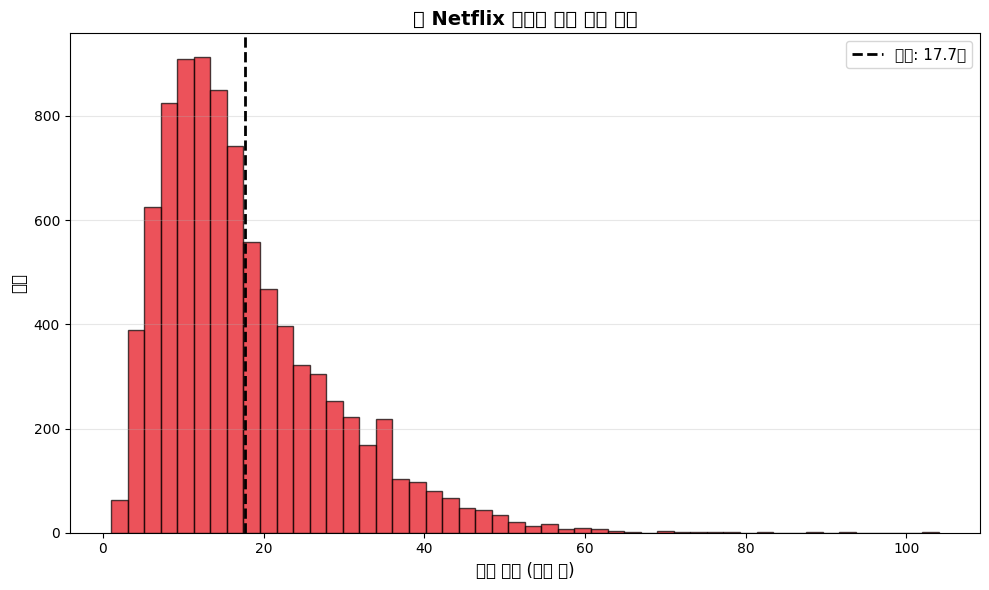

💡 평균 제목 길이: 17.7자
💡 최대/최소: 104/1자


In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['title_length'], bins=50, color='#E50914', alpha=0.7, edgecolor='black')
plt.xlabel('제목 길이 (글자 수)', fontsize=12)
plt.ylabel('개수', fontsize=12)
plt.title('📏 Netflix 콘텐츠 제목 길이 분포', fontsize=14, fontweight='bold')

avg_length = df['title_length'].mean()
plt.axvline(avg_length, color='black', linestyle='--', linewidth=2,
            label=f'평균: {avg_length:.1f}자')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"💡 평균 제목 길이: {avg_length:.1f}자")
print(f"💡 최대/최소: {df['title_length'].max()}/{df['title_length'].min()}자")

### 5.2 연대별 막대그래프

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

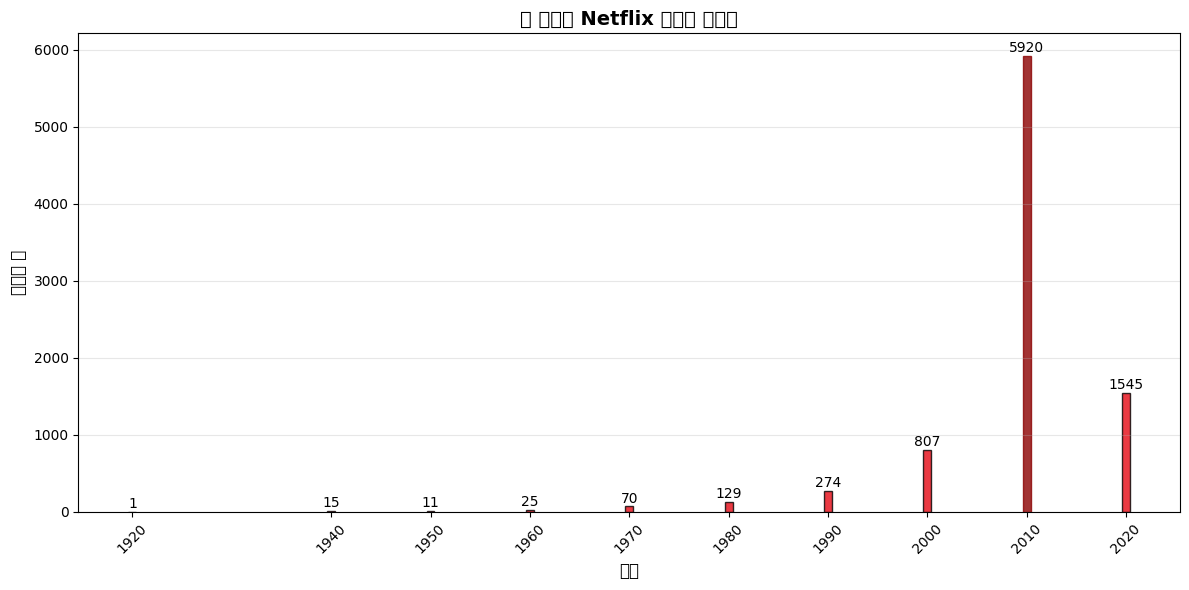

💡 2010년대에 가장 많은 5,920개 제작


In [21]:
decade_counts = df['decade'].value_counts().sort_index().tail(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(decade_counts.index, decade_counts.values, 
               color='#E50914', alpha=0.8, edgecolor='black')

# 최대값인 막대를 다른 색으로
max_idx = decade_counts.values.argmax()
bars[max_idx].set_color('#8B0000')

plt.xlabel('연대', fontsize=12)
plt.ylabel('콘텐츠 수', fontsize=12)
plt.title('📅 연대별 Netflix 콘텐츠 제작량', fontsize=14, fontweight='bold')
plt.xticks(decade_counts.index, rotation=45)
plt.grid(axis='y', alpha=0.3)

# 각 막대 위에 값 표시
for decade, count in zip(decade_counts.index, decade_counts.values):
    plt.text(decade, count + 50, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

peak_decade = decade_counts.idxmax()
print(f"💡 {peak_decade}년대에 가장 많은 {decade_counts.max():,}개 제작")

### 5.3 한국 콘텐츠 파이차트

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


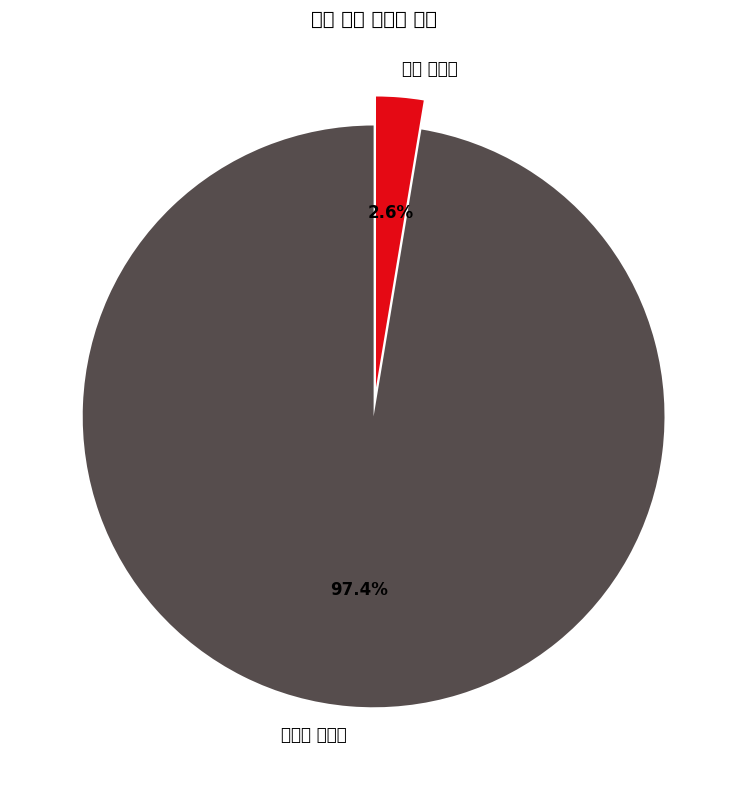

💡 한국 콘텐츠 비율: 2.6%


In [22]:
korean_counts = df['is_korean'].value_counts()

plt.figure(figsize=(8, 8))
colors = ['#564d4d', '#E50914']
explode = (0, 0.1)

plt.pie(korean_counts.values, 
        labels=['비한국 콘텐츠', '한국 콘텐츠'],
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('🇰🇷 한국 콘텐츠 비율', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

korean_pct = (df['is_korean'].sum() / len(df)) * 100
print(f"💡 한국 콘텐츠 비율: {korean_pct:.1f}%")

### 5.4 Movie vs TV Show 막대그래프

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

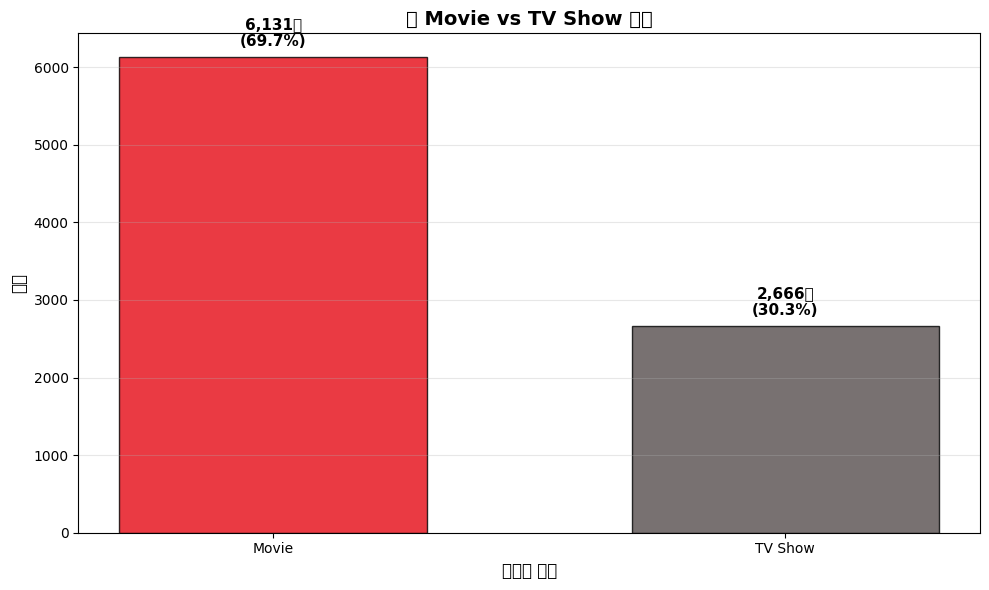

💡 영화: 6,131개 (69.7%)
💡 TV쇼: 2,666개 (30.3%)


In [24]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(type_counts.index, type_counts.values, 
               color=['#E50914', '#564d4d'], alpha=0.8, 
               edgecolor='black', width=0.6)

plt.xlabel('콘텐츠 유형', fontsize=12)
plt.ylabel('개수', fontsize=12)
plt.title('🎬 Movie vs TV Show 분포', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, type_counts.values):
    height = bar.get_height()
    pct = (count / len(df)) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{count:,}개\n({pct:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

movie_pct = (type_counts.get('Movie', 0) / len(df)) * 100
tv_pct = (type_counts.get('TV Show', 0) / len(df)) * 100
print(f"💡 영화: {type_counts.get('Movie', 0):,}개 ({movie_pct:.1f}%)")
print(f"💡 TV쇼: {type_counts.get('TV Show', 0):,}개 ({tv_pct:.1f}%)")

---

## Section 6: 데이터 저장

In [25]:
df.to_csv('../data/netflix_cleaned.csv', index=False)

print('✅ 데이터 저장 완료: data/netflix_cleaned.csv')
print(f'\n최종 데이터: {len(df):,}행 x {len(df.columns)}열')
print(f'\n파생변수 6개:')
print('  1. decade - 연대')
print('  2. is_korean - 한국 콘텐츠 여부')
print('  3. title_length - 제목 길이')
print('  4. content_age - 콘텐츠 나이')
print('  5. is_recent - 최근 5년 여부')
print('  6. has_cast - 출연진 정보 유무')

✅ 데이터 저장 완료: data/netflix_cleaned.csv

최종 데이터: 8,797행 x 18열

파생변수 6개:
  1. decade - 연대
  2. is_korean - 한국 콘텐츠 여부
  3. title_length - 제목 길이
  4. content_age - 콘텐츠 나이
  5. is_recent - 최근 5년 여부
  6. has_cast - 출연진 정보 유무


---

## Section 7: 다음 단계 안내

## 🎯 다음 단계: Streamlit 대시보드로!

### ✅ 지금까지 한 일
- ✅ 데이터 로드 및 탐색
- ✅ 결측치 처리
- ✅ 파생변수 생성 (6개)
- ✅ matplotlib으로 시각화 (4개 그래프)

### 📊 이제 할 일
**app.py에서 이 코드를 Streamlit + Plotly로 변환하기!**

#### matplotlib → Plotly 변환 예시:

**Before (Jupyter)**
```python
plt.hist(df['title_length'], bins=30)
```

**After (Streamlit)**
```python
import plotly.express as px
fig = px.histogram(df, x='title_length', nbins=30)
st.plotly_chart(fig)
```

---

**준비됐나요? 이제 `app.py`로 이동해서 인터랙티브 대시보드를 만들어봅시다!** 🚀